# Ordered Crossover vs. Partially-Matched Crossover:
## A Comparative Analysis of two crossover methods applied to TSP

In [5]:
# first we import necessary packages
import array
import random
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
# next we read in the 1.5% mutation rate data
ordered1 = pd.read_csv('17cityOrderedCx1_5df',index_col=0)
partial1 = pd.read_csv('17cityPartialCx1_5df',index_col=0)
combo = pd.DataFrame()
combo['orderedMin']=ordered1['min']
combo['partialMin']=partial1['min']
combo['orderedMax']=ordered1['max']
combo['partialMax']=partial1['max']
combo['orderedStd']=ordered1['std']
combo['partialStd']=partial1['std']

In [7]:
# and then the 10% mutation rate data
ordered2 = pd.read_csv('17cityOrderedCx10_0df',index_col=0)
partial2 = pd.read_csv('17cityPartialCx10_0df',index_col=0)
combo2 = pd.DataFrame()
combo2['orderedMin']=ordered2['min']
combo2['partialMin']=partial2['min']
combo2['orderedMax']=ordered2['max']
combo2['partialMax']=partial2['max']
combo2['orderedStd']=ordered2['std']
combo2['partialStd']=partial2['std']

## OX outperforms PMX
Plotting the 'best'/most-minimized score over all 40 generations portrays Ordered Crossover (yellow) outperforming Partially-Matched Crossover (red)

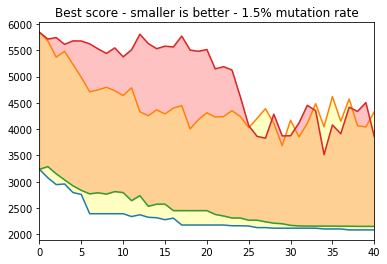

In [8]:
# plotting maxEvalFuncScore-minEvalFuncScore for OX (yellow) and PMX (red)
# lower is better!! TSP is all about minimizing tour length
z = combo.plot(y=['orderedMin','orderedMax','partialMin','partialMax'],title='Best score - smaller is better - 1.5% mutation rate',legend=False)
z.fill_between(range(0,41),combo['partialMin'],combo['partialMax'],color='red',alpha='0.24')
z.fill_between(range(0,41),combo['orderedMin'],combo['orderedMax'],color='yellow',alpha='0.24')
z.figure.savefig('comparison1_5',format="png")

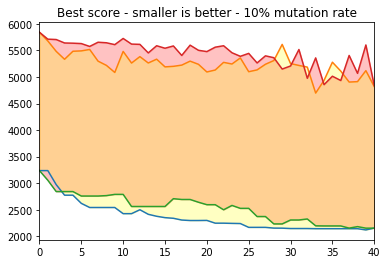

In [9]:
# plot the same thing for 10%
y = combo2.plot(y=['orderedMin','orderedMax','partialMin','partialMax'],title='Best score - smaller is better - 10% mutation rate',legend=False)
y.fill_between(range(0,41),combo2['partialMin'],combo2['partialMax'],color='red',alpha='0.24')
y.fill_between(range(0,41),combo2['orderedMin'],combo2['orderedMax'],color='yellow',alpha='0.24')
y.figure.savefig('comparison10',format="png")

## But after ~20 generations, PMX is generating better solutions on average
Plotting the standard deviation reveals an interesting trend; whereas Ordered Crossover demonstrates a steady decrease (the whole population is slowly getting better), Partially-Matched Crossover increases moderately before a sudden nosedive during the early 20th generations. 

Since standard deviation is a measure of the 'spreadness' of data, this sharp decrease suggests the various candidate solutions generated by PMX suddenly begin to value homogeneity, producing offspring very similar to one another.

Considering how PMX works, with mapping-relationships inside the selected chromosome substrings informing the ‘legalization’ process of offspring (maintaining ordered chromosomes is a requirement for solving TSP), we predict this sudden improvement is due to a series of two or three wildly-successful mutations [due to ‘legalization’]. 

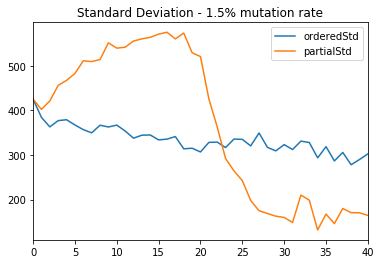

In [10]:
# plot std for 1.5% mutation rate
x=combo.plot(y=['orderedStd','partialStd'],title='Standard Deviation - 1.5% mutation rate')
x.figure.savefig('std1_5',format="png")

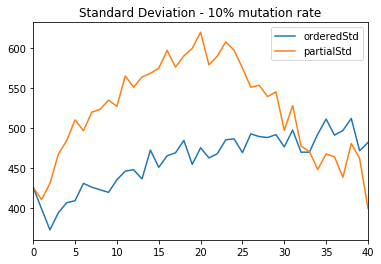

In [11]:
# plot std for 10% mutation rate
w=combo2.plot(y=['orderedStd','partialStd'],title='Standard Deviation - 10% mutation rate')
w.figure.savefig('std10',format="png")